In [38]:
import pandas as pd, numpy, scipy.stats as stats, matplotlib.pyplot as plt, seaborn as sns, sklearn.preprocessing as prep

## Analýza štruktúry dát:
## súbory:
### session.csv 
- súbor obsahuje informácie ohľadom užívateľských sedení v e-shope. obsahuje aj driver atribút "ack", ktorý hovorí o zakúpení počas sedenia.
- odkazuje na používateľa pomocou user_id a pomocou product_ean s produktami (aj keď medzi session.csv a product.csv nie je žiaden prienik)
- počet záznamov: 11040, počet atribútov: 25
### user.csv    
- obsahuje vitálne osobné informácie o používateľovi: jeho lokáciu, pohlavie, email, dátum registrácie a adresu.
- počet záznamov: 2593, počet atribútov: 11
### product.csv 
- obsahuje infromácie o lokalite produktu: názov obchodu, lokáciu obchodu (krajina a mesto) a EAN produktu
- počet záznamov: 14909, počet atribútov: 4

## Analýza vybraných atribútov atribútov:
### session.csv 
- user_id -> identifikátor používateľa, spája sedenie s tabuľkou s informáciami o používateľovi
- product_ean -> identifikátor produktu, spája sedenie s tabuľkou s informáciami o produkte
- ack -> predikovaná premenná, ktorá určuje, či bol počas sedenia zakúpený produkt
### user.csv   
- user_id -> dentifikátor používateľa, spája sedenie s tabuľkou s informáciami o používateľovi
- birthdate -> uvedený dátum narodenia používateľa
- registration -> dátum registrácie používateľa
- current_location -> momentálna poloha používateľa
- username -> zvolené používateľské meno (alias) používateľa
### product.csv 
- code -> kód krajiny, kde sa produkt nachádza
- product_ean -> identifikátor produktu
- store_name -> názov obcohdu, ktorý daný produkt ponúka
- location -> lokácia produktu/obchodu

nacitanie dat do dafatfamov

In [39]:
df_product = pd.read_csv("product.csv", sep='\t')
df_session = pd.read_csv("session.csv", sep='\t')
df_users = pd.read_csv("user.csv", sep='\t')

print(len(df_product), len(df_session), len(df_users))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_session)

14908 11039 2592
       session_id  session_duration  pct_mouse_click  pct_mouse_move  \
0           29352          46.20666          8.66407         8.38688   
1          769698         205.16791         12.02141        12.17055   
2          284853         234.67891         12.16289         9.58028   
3         1427567         144.28902         12.06736         7.21877   
4          465974         108.38966         11.99156        10.16503   
5          223045          47.96486         11.32534        11.29606   
6          645580         180.53071         10.06536        10.20590   
7          689178         137.24503         14.04876         7.73191   
8          964143         210.52018         12.00617         8.79124   
9         1056380         160.57516         10.54082         8.26685   
10         359238          82.15672         11.11654        11.14682   
11        1049190          55.94230          9.44686         8.21307   
12         335519         155.18465         13.

pocet zaznamov v kazdom subore

In [40]:
print(f'pocet pozretych produktov: {len(df_product)}\npocet uzivatelskych sedeni: {len(df_session)}\npocet pouzivatelov: {len(df_users)}')

pocet pozretych produktov: 14908
pocet uzivatelskych sedeni: 11039
pocet pouzivatelov: 2592


# Analyza vztahov medzi atributmi

- page_activity_duration vs ack

count    11028.000000
mean         9.079262
std          2.065196
min          3.403930
25%          7.636868
50%          8.794040
75%         10.236818
max         17.535840
Name: page_activity_duration, dtype: float64


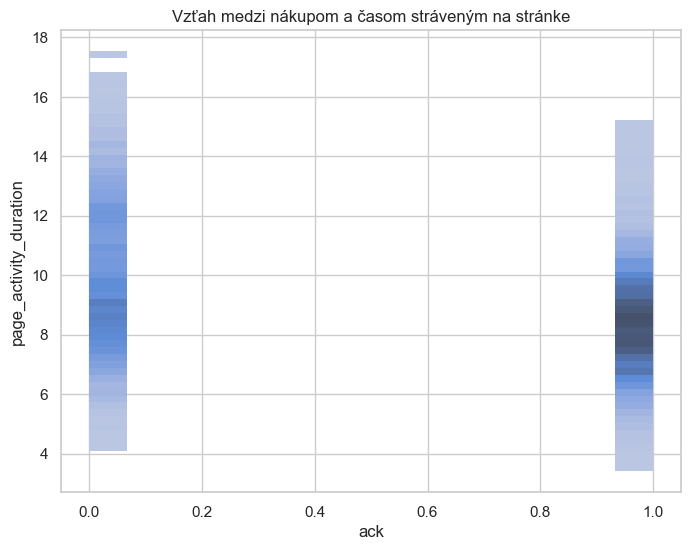

In [41]:
print(df_session["page_activity_duration"].describe())
df_session
sns.set(style='whitegrid')  # Optional: Set the style
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.histplot(x='ack', y="page_activity_duration", data=df_session)
plt.xlabel('ack')
plt.ylabel('page_activity_duration')
plt.title('Vzťah medzi nákupom a časom stráveným na stránke')
plt.show()

#### Vztah medzi doubleclick a ack

count    11028.000000
mean        10.784718
std          2.032982
min          3.031020
25%          9.400290
50%         11.117875
75%         12.237280
max         16.849740
Name: pct_doubleclick, dtype: float64


Text(0.5, 1.0, 'Vzťah medzi nákupom a počtom dvoj-klikov')

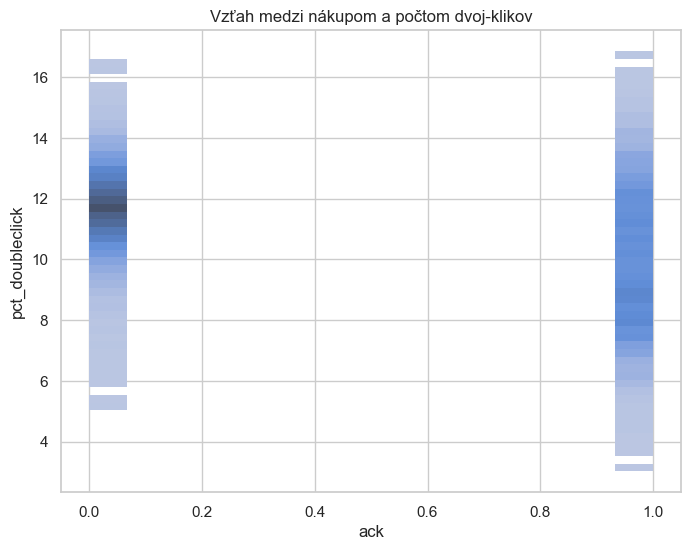

In [42]:

# new_frame = df_session["session_duration"]/df_session["pct_mouse_click"]
print(df_session["pct_doubleclick"].describe())
sns.set(style='whitegrid')  # Optional: Set the style
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.histplot(x='ack', y="pct_doubleclick", data=df_session)
plt.xlabel('ack')
plt.ylabel('pct_doubleclick')
plt.title('Vzťah medzi nákupom a počtom dvoj-klikov')



- Spozorovana koncentracia poctu doubleklikov na 12 pre nevykonane nakupy

#### Pokus o najdenie vztahu medzi click a double click. Nasledne vztah ich pomeru k nakupom

                 pct_click  pct_doubleclick
pct_click         1.000000         0.492175
pct_doubleclick   0.492175         1.000000


Text(0.5, 1.0, 'Vzťah medzi počtom kliknutí a počtom dvoj-klikov')

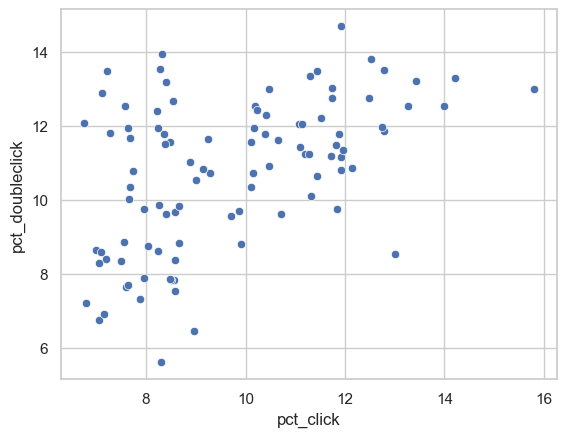

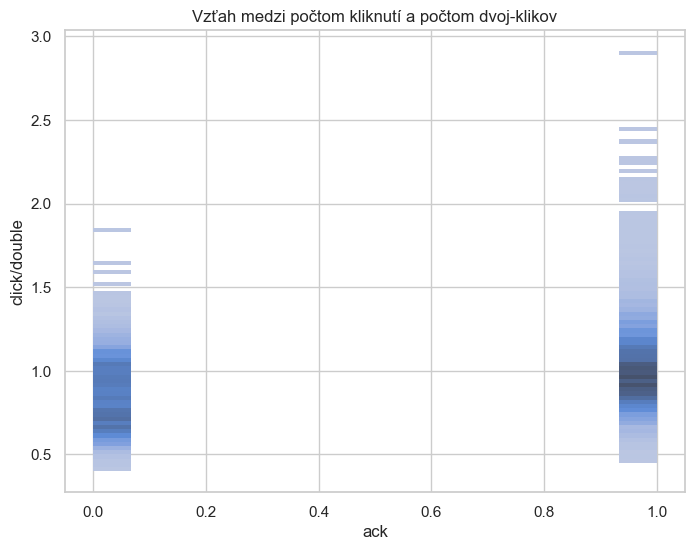

In [43]:
ratio_df = pd.DataFrame(df_session['pct_click']/df_session['pct_doubleclick'])
ratio_df["ack"] = df_session['ack']
ratio_df.columns = ["click/double","ack"]
ratio_df
sample_ses = df_session.sample(100,random_state=12)

print(sample_ses[["pct_click","pct_doubleclick"]].corr())
sns.scatterplot(x='pct_click',y="pct_doubleclick",data=sample_ses)
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6)) 
sns.histplot(x='ack', y="click/double", data=ratio_df)
plt.xlabel('ack')
plt.ylabel('click/double')
plt.title('Vzťah medzi počtom kliknutí a počtom dvoj-klikov')


- dosiahnutie alebo presiahnutie pomeru 1:1 by mohlo signalizovat nakup

#### Vztah medzi mouse move rel distance a ack

count    11027.000000
mean        10.002395
std          2.162178
min          3.052910
25%          8.282010
50%          9.829440
75%         11.722350
max         16.883540
Name: mouse_move_total_rel_distance, dtype: float64

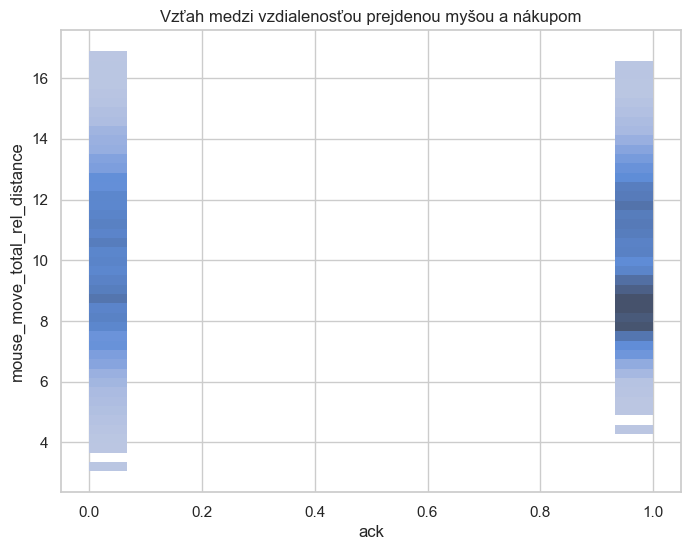

In [44]:
new_frame = df_session["session_duration"]/df_session["pct_mouse_click"]
sns.set(style='whitegrid')  # Optional: Set the style
plt.figure(figsize=(8, 6))  # Optional: Set_ the figure size
sns.histplot(x='ack', y="mouse_move_total_rel_distance", data=df_session)
plt.xlabel('ack')
plt.ylabel('mouse_move_total_rel_distance')
plt.title('Vzťah medzi vzdialenosťou prejdenou myšou a nákupom')
df_session["mouse_move_total_rel_distance"].describe()

- aj ked je vysoka koncentracia medzi 8 a 9 pre ack 1 celkova distribucia zvysku je podobna ako pre ack 0

#### Vztah medzi scroll move duration a poctom klikov

                          pct_scroll_move_duration  pct_click
pct_scroll_move_duration                  1.000000   0.638241
pct_click                                 0.638241   1.000000


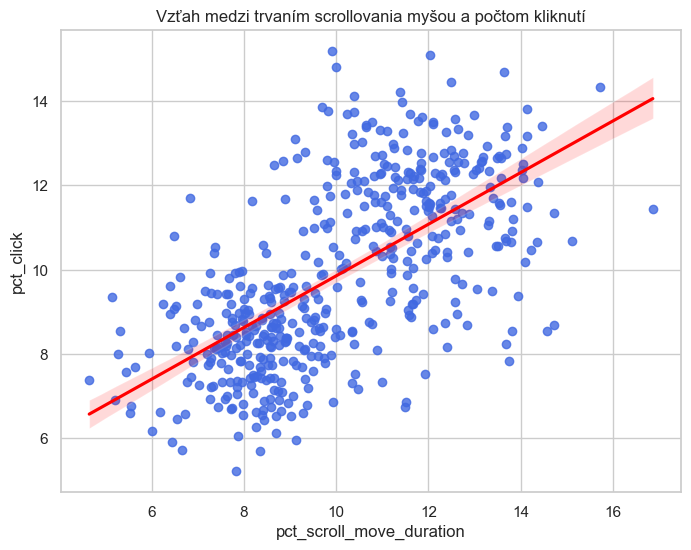

In [45]:
sampled = df_session.sample(n=500, random_state=50)
print(sampled[["pct_scroll_move_duration","pct_click"]].corr())
def matej(x1, x2):
    sns.set(style='whitegrid') 
    plt.figure(figsize=(8, 6))  
    sns.regplot(x=f'{x1}', y=f'{x2}',scatter=True,data=sampled,scatter_kws={"color":"royalblue"},color="red")
    plt.xlabel(f'{x1}')
    plt.ylabel(f'{x2}')
    plt.title('Vzťah medzi trvaním scrollovania myšou a počtom kliknutí')
y = sampled.columns[0]
matej('pct_scroll_move_duration', 'pct_click')

- viditelna korelacia medzi atributmi pct click a pct scroll move duration
- moznost pozorovania vztahu ich pomeru s ack

#### Pozorovanie vztahu pomeru pct scroll move dur / pct click a ack

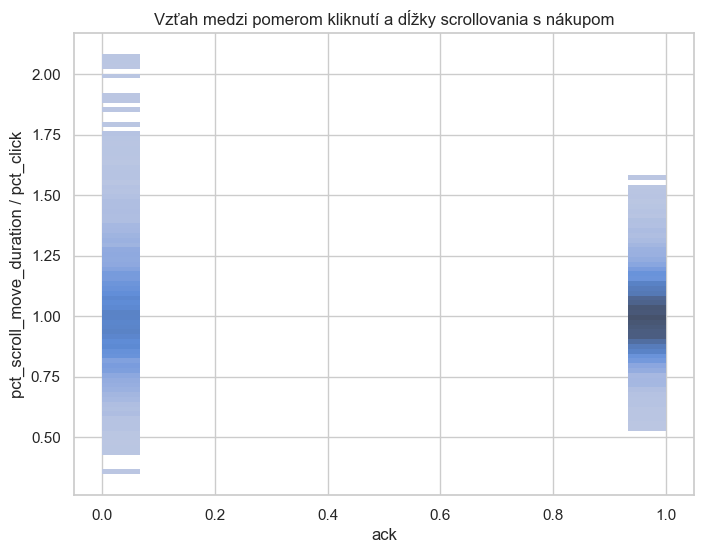

In [46]:
sampled = df_session.sample(n=10000, random_state=50)
def matej2(x, y):
    pom_f = pd.DataFrame(sampled[f'{x}'] / sampled[f'{y}'])
    pom_f["ack"] = sampled["ack"]
    pom_f.columns = [f'{x} / {y}', "ack"]
    pom_f[f'{x} / {y}'] =  pom_f[f'{x} / {y}'].where(pom_f[f'{x} / {y}'] < 4)
    sns.set(style='whitegrid')  # Optional: Set the style
    plt.figure(figsize=(8, 6))  # Optional: Set_ the figure size
    sns.histplot(x='ack', y=f'{x} / {y}', data=pom_f)
    plt.xlabel('ack')
    plt.ylabel(f'{x} / {y}')
    plt.title('Vzťah medzi pomerom kliknutí a dĺžky scrollovania s nákupom')
matej2('pct_scroll_move_duration', 'pct_click')

- vysoka koncentracia pri pomere 1:1 moznost pre vytvorenie hypotezy

#### Problémy v dátach: duplicitné user_id v tabuľke user.csv
#### Riešenine: odstránenie všetkých výskytov duplicitného user_id


In [47]:
df_nodupuser = df_users
idecka = {}

for id in df_users["user_id"]:
    if id in idecka.keys():
       idecka[id] += 1 
    else:
        idecka[id] = 1
to_remove = []
for row in df_users.iterrows():
    index = row[0]
    user_id = row[1]["user_id"]
    if idecka[user_id] > 1:
        to_remove.append(index)
print(to_remove)
df_nodupuser = df_nodupuser.drop(to_remove)
print(len(df_users), len(df_nodupuser))
df_nodupuser.reset_index()
        





[0, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16, 17, 20, 21, 22, 25, 26, 28, 31, 32, 33, 37, 38, 39, 41, 43, 44, 45, 46, 47, 49, 50, 51, 53, 56, 57, 58, 59, 62, 64, 65, 66, 67, 68, 69, 71, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 86, 92, 94, 97, 100, 101, 102, 107, 109, 111, 114, 115, 116, 117, 118, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 134, 136, 138, 139, 140, 141, 144, 145, 148, 149, 151, 152, 153, 154, 155, 156, 160, 162, 163, 164, 165, 166, 168, 169, 174, 175, 176, 177, 182, 184, 186, 187, 190, 191, 192, 194, 196, 198, 202, 205, 206, 207, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 223, 224, 225, 226, 227, 229, 230, 231, 232, 233, 235, 236, 237, 240, 241, 242, 243, 244, 247, 248, 249, 250, 252, 253, 259, 260, 261, 262, 263, 265, 266, 267, 268, 271, 272, 273, 274, 276, 277, 278, 281, 282, 283, 284, 285, 286, 287, 288, 292, 293, 296, 299, 300, 301, 302, 303, 305, 306, 307, 308, 309, 310, 311, 313, 315, 316, 318, 320, 321, 322, 323, 325, 326, 328, 329, 330, 332, 33

index         race         username  sex  \
0        1  unspecified    pirescarolina    F   
1        2          NaN     maskovalucie  NaN   
2        9          NaN         gda-cruz  NaN   
3       11          NaN   trommlerleonie    M   
4       12          NaN      igorcostela  NaN   
..     ...          ...              ...  ...   
944   2575          NaN      smithcarmen    M   
945   2578          NaN          wbarber    M   
946   2581          NaN        xwatanabe    F   
947   2583        white  nogueiragabriel  NaN   
948   2590          NaN         ejelinek    M   

                                             residence  user_id  \
0                                                  NaN     2066   
1                                                  NaN     1023   
2                                                  NaN     2061   
3                                                  NaN       96   
4                                                  NaN     1196   
..                                                 ...      ...   
944  564 Andrea Freeway Suite 701\r\nWilliamsmouth,...     1201   
945                                                NaN     1551   
946                                                NaN     2093   
947                                                NaN     2511   
948                                                NaN     1215   

                     name                                            address  \
0           Pietra Castro  Campo de Araújo, 606\r\nMonte São José\r\n5755...   
1      Růžena Pospíšilová                      Kremnická 66\r\n518 24 Žacléř   
2    Emanuel da Conceição                                                NaN   
3         Leo Hiller-Holt                 Täschering 491\r\n69752 Eberswalde   
4        Beatriz Carvalho  Loteamento Nathan Melo, 8\r\nSantana Do Cafeza...   
..                    ...                                                ...   
944      Keith Patton DDS  04212 Melvin Mountain Suite 359\r\nSouth Dougl...   
945       Eduardo Johnson  408 Davis Junction Apt. 020\r\nMejiaside, PA 6...   
946                 松本 香織         岩手県山武郡九十九里町虎ノ門虎ノ門ヒルズ森タワー4丁目24番12号 ハイツ港南664   
947        Arthur Cardoso                                                NaN   
948          Robert Novák     U Nových Domů I 3\r\n389 66 Kostelec nad Labem   

                             mail  \
0           gomesana@yahoo.com.br   
1              pavelfiala@post.cz   
2          gmonteiro@yahoo.com.br   
3           daniellesontag@gmx.de   
4    fogacaluiz-otavio@bol.com.br   
..                            ...   
944       elizabeth32@hotmail.com   
945            hvilla@hotmail.com   
946        yamamotorika@yahoo.com   
947       correiaalana@bol.com.br   
948          sonakolarova@post.cz   

                                    current_location          registration  \
0    (Decimal('28.1621345'), Decimal('-173.517410'))            2021-08-09   
1      (Decimal('-80.913702'), Decimal('21.046467'))            2020/08/06   
2     (Decimal('89.734118'), Decimal('-103.039006'))  11/07/2018, 00:00:00   
3    (Decimal('-81.5533295'), Decimal('-72.476163'))           12 Jan 2014   
4     (Decimal('80.7165165'), Decimal('-17.568838'))           25 Nov 2013   
..                                               ...                   ...   
944   (Decimal('-70.997122'), Decimal('156.990661'))            2021-01-12   
945     (Decimal('35.572745'), Decimal('13.032466'))  03/31/2018, 00:00:00   
946  (Decimal('-12.9191985'), Decimal('-21.733244'))           14 Oct 2013   
947     (Decimal('-39.812127'), Decimal('0.187696'))  07/05/2022, 00:00:00   
948  (Decimal('-40.2046775'), Decimal('-54.937258'))            2022/05/04   

      birthdate  
0           NaN  
1    1921-09-21  
2    2000-11-28  
3    1937-11-17  
4           NaN  
..          ...  
944  1975-01-27  
945  1951-11-07  
946  2019-02-17  
947  1968-08-08  
948  1943-10-06  

[949 rows x 12 columns]

### vytvorenie joined tabulky pre sessions a users

In [48]:
df_merged = df_session.merge(df_nodupuser, how="inner")
df_merged


session_id  session_duration  pct_mouse_click  pct_mouse_move  \
0         223045          47.96486         11.32534        11.29606   
1         623734         132.25714         11.88174        11.58618   
2         159057         143.60687          7.83379         2.92107   
3         551040         248.09308          4.95972         4.52411   
4           6355         165.90198         11.27945        14.79490   
...          ...               ...              ...             ...   
4070      817978         168.30985         13.22728        13.23870   
4071      992036         172.54963         11.39298        14.91608   
4072      856525          92.97564          9.92790         7.32274   
4073      472623          54.60196         10.88118        11.77482   
4074       88768         158.27488         10.70147        11.07255   

      pct_scrandom browser_name  pct_scroll_move  wild_mouse_duration  \
0         48.47653      firefox         48.95236             11.39144   
1         25.58663       safari         51.07750              9.44179   
2         70.63719        opera         41.89119             10.05044   
3         48.16995        opera         54.76994              9.96582   
4         49.78113       chrome         44.72991              8.48023   
...            ...          ...              ...                  ...   
4070      59.44815         edge         43.64091             11.70369   
4071      41.20110         edge         47.24597              9.50976   
4072      59.13477       chrome         58.16094             10.43395   
4073      44.68072       chrome         57.48251              7.80662   
4074      60.81757       chrome         60.49513              8.79697   

      total_load_time screen_width  ...         race          username  sex  \
0             2.30071         1280  ...        black         gscalfaro  NaN   
1             1.84508        lower  ...        black         gscalfaro  NaN   
2             2.92902        lower  ...        black         gscalfaro  NaN   
3             8.07877         1366  ...        black         gscalfaro  NaN   
4             2.04936          800  ...        black         gscalfaro  NaN   
...               ...          ...  ...          ...               ...  ...   
4070          1.05211         1280  ...        asian            ccerna    M   
4071          2.63677       higher  ...          NaN  agnolosanguineti  NaN   
4072          5.45315          800  ...          NaN          milena14    F   
4073          4.27341         1280  ...          NaN          milena14    F   
4074          7.33300          800  ...  unspecified           donna07    F   

                         residence                   name  \
0                              NaN          Gianni Sagese   
1                              NaN          Gianni Sagese   
2                              NaN          Gianni Sagese   
3                              NaN          Gianni Sagese   
4                              NaN          Gianni Sagese   
...                            ...                    ...   
4070  Pyšelská 1\r\n369 25 Žamberk         Miloslav Dušek   
4071                           NaN  Sig. Micheletto Dalla   
4072                           NaN          Bianca Fogaça   
4073                           NaN          Bianca Fogaça   
4074                           NaN    Angelica Berlusconi   

                                                address  \
0     Piazza Silvio, 97 Appartamento 98\r\n67058, Sa...   
1     Piazza Silvio, 97 Appartamento 98\r\n67058, Sa...   
2     Piazza Silvio, 97 Appartamento 98\r\n67058, Sa...   
3     Piazza Silvio, 97 Appartamento 98\r\n67058, Sa...   
4     Piazza Silvio, 97 Appartamento 98\r\n67058, Sa...   
...                                                 ...   
4070                                                NaN   
4071  Contrada Roman, 975 Appartamento 5\r\n00127, M...   
4072                                                NaN   
4073

#### Problém v dátach: 
- nekonzistentná forma dátumu registrácie
#### Riešenie: 
- upravenie datumov registracie na jednotny format rrrr-mm-dd

#### pôvodná forma dátumu registrácie mala 4 druhy:
- rrrr-mm-dd
- rrrr/mm/dd
- mm/dd/rrrr, 00:00:00
- dd Mes rrrr
##### Bol zvolený formát rok-mesiac-den a tabuľka bola upravená

In [49]:
# rrrr-mm-dd
# rrrr/mm/dd
# mm/dd/rrrr, 00:00:00
# dd Mes rrrr

def get_format(date):
    months = {
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "Jun": 6,
    "Jul": 7,
    "Aug": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12
}
    if len(date.split("-")) == 3:
        splitted = date.split("-")
        rok = splitted[0]
        mesiac = splitted[1]
        den = splitted[2]
    elif len(date.split("/")) == 3:
        splitted = date.split("/")
        if len(splitted[2]) > 4:
            mesiac = splitted[0]
            den = splitted[1]
            rok = splitted[2][:4]
        else:
            rok = splitted[0]
            mesiac = splitted[1]
            den = splitted[2]
    elif len(date.split(" ")) == 3:
        splitted = date.split(" ")
        den = splitted[0]
        mesiac = months[splitted[1]]
        rok = splitted[2]
    return f"{rok}-{mesiac}-{den}"

for row in df_merged.iterrows():
    datum = get_format(row[1]["registration"])
    df_merged.at[row[0], "registration"] = datum

df_merged

session_id  session_duration  pct_mouse_click  pct_mouse_move  \
0         223045          47.96486         11.32534        11.29606   
1         623734         132.25714         11.88174        11.58618   
2         159057         143.60687          7.83379         2.92107   
3         551040         248.09308          4.95972         4.52411   
4           6355         165.90198         11.27945        14.79490   
...          ...               ...              ...             ...   
4070      817978         168.30985         13.22728        13.23870   
4071      992036         172.54963         11.39298        14.91608   
4072      856525          92.97564          9.92790         7.32274   
4073      472623          54.60196         10.88118        11.77482   
4074       88768         158.27488         10.70147        11.07255   

      pct_scrandom browser_name  pct_scroll_move  wild_mouse_duration  \
0         48.47653      firefox         48.95236             11.39144   
1         25.58663       safari         51.07750              9.44179   
2         70.63719        opera         41.89119             10.05044   
3         48.16995        opera         54.76994              9.96582   
4         49.78113       chrome         44.72991              8.48023   
...            ...          ...              ...                  ...   
4070      59.44815         edge         43.64091             11.70369   
4071      41.20110         edge         47.24597              9.50976   
4072      59.13477       chrome         58.16094             10.43395   
4073      44.68072       chrome         57.48251              7.80662   
4074      60.81757       chrome         60.49513              8.79697   

      total_load_time screen_width  ...         race          username  sex  \
0             2.30071         1280  ...        black         gscalfaro  NaN   
1             1.84508        lower  ...        black         gscalfaro  NaN   
2             2.92902        lower  ...        black         gscalfaro  NaN   
3             8.07877         1366  ...        black         gscalfaro  NaN   
4             2.04936          800  ...        black         gscalfaro  NaN   
...               ...          ...  ...          ...               ...  ...   
4070          1.05211         1280  ...        asian            ccerna    M   
4071          2.63677       higher  ...          NaN  agnolosanguineti  NaN   
4072          5.45315          800  ...          NaN          milena14    F   
4073          4.27341         1280  ...          NaN          milena14    F   
4074          7.33300          800  ...  unspecified           donna07    F   

                         residence                   name  \
0                              NaN          Gianni Sagese   
1                              NaN          Gianni Sagese   
2                              NaN          Gianni Sagese   
3                              NaN          Gianni Sagese   
4                              NaN          Gianni Sagese   
...                            ...                    ...   
4070  Pyšelská 1\r\n369 25 Žamberk         Miloslav Dušek   
4071                           NaN  Sig. Micheletto Dalla   
4072                           NaN          Bianca Fogaça   
4073                           NaN          Bianca Fogaça   
4074                           NaN    Angelica Berlusconi   

                                                address  \
0     Piazza Silvio, 97 Appartamento 98\r\n67058, Sa...   
1     Piazza Silvio, 97 Appartamento 98\r\n67058, Sa...   
2     Piazza Silvio, 97 Appartamento 98\r\n67058, Sa...   
3     Piazza Silvio, 97 Appartamento 98\r\n67058, Sa...   
4     Piazza Silvio, 97 Appartamento 98\r\n67058, Sa...   
...                                                 ...   
4070                                                NaN   
4071  Contrada Roman, 975 Appartamento 5\r\n00127, M...   
4072                                                NaN   
4073

## Hypotéza 1: mean rozdielu nakupov a nenakupov v strednom veku (40 - 65 rokov) je rovnaky ako mean zvysku
### test hypotezy: Mann-Whitney-U test na dvoch vekovych skupinanch
- pouzity mann-whitney-u pretoze nemame normalovu distribuciu a taktiez sample sizes su rozdielne
### H_0: meany populacii su rovnake
### H_A: meany su signifikantne rozdielne
### Výsledok hypotézy: 
- po testovani Mann-Whitney-U testom sme zamietli H_0 -> meany populacii su rovnake, kvoli p=0.03. Z toho mozeme prepokladat ze je signifikantny rozdiel medzi ich priemernymi hodnotami.

count    2198.000000
mean       57.786624
std        32.916543
min         0.000000
25%        30.000000
50%        57.000000
75%        83.000000
max       116.000000
Name: age, dtype: float64


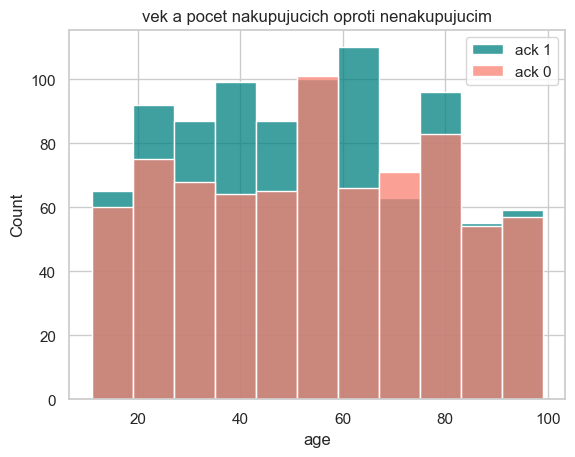

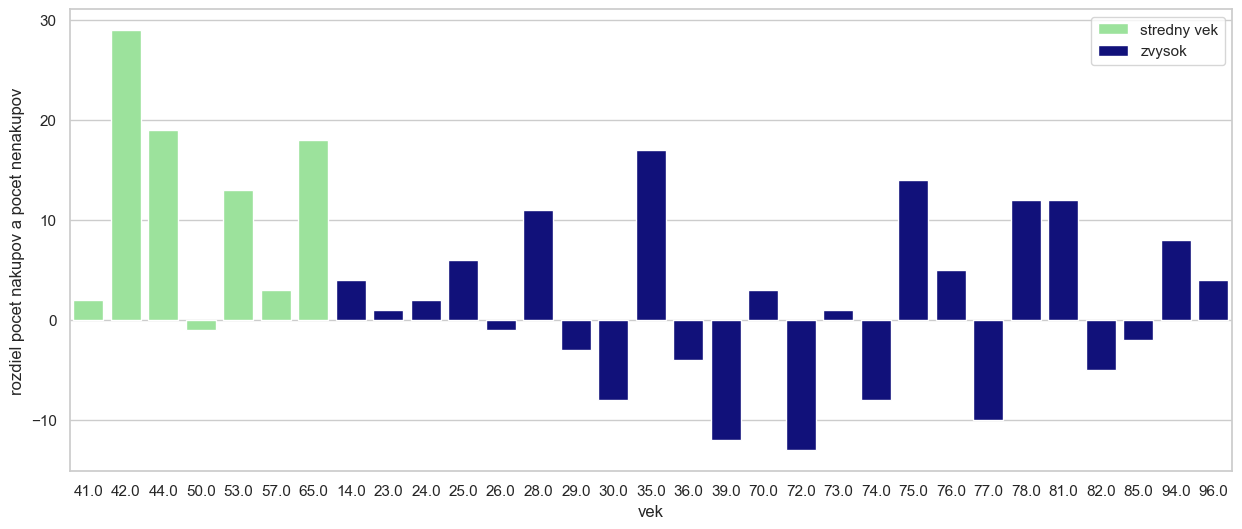

C:\Users\splha\AppData\Local\Temp\ipykernel_14448\3375173338.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age',y='size',data=ack_diff,palette="flare")


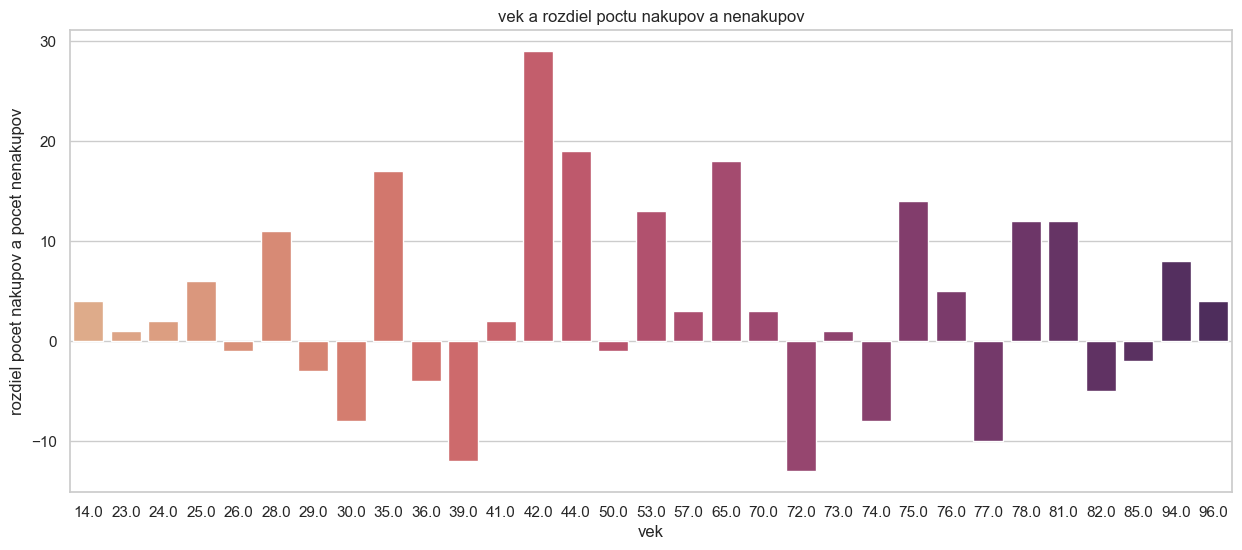

mean group 1:  11.857142857142858 
mean group 2:  1.4166666666666667


MannwhitneyuResult(statistic=129.5, pvalue=0.0333742466101653)

In [50]:
from datetime import datetime
#ziskavanie vekov

nakupy = {}

for start in range(10, 99, 10):
    end = start + 9
    key = f"{start}-{end}"
    nakupy[key] = 0


def calculate_age(birthdate):
    birthdate = datetime.strptime(birthdate, "%Y-%m-%d")
    current_date = datetime.now()
    age = current_date.year - birthdate.year - ((current_date.month, current_date.day) < (birthdate.month, birthdate.day))
    return age

veky = []
for row in df_merged.iterrows():
    vek = None
    if str(row[1]["birthdate"]) != 'nan':
        vek  = int(calculate_age(row[1]["birthdate"]))
        veky.append(vek)
    else:
        veky.append(vek)
    if vek and row[1]["ack"] == 1:
        for key in nakupy:
            start, end = map(int, key.split('-'))
            if start <= vek <= end:
                nakupy[key] += 1
    


df_merged["age"] = veky
ack_zero = pd.DataFrame()
ack_one = pd.DataFrame()

print(df_merged["age"].describe())

ack_zero["age"] = df_merged["age"][(df_merged["age"] > 10) & (df_merged["age"] < 100) & (df_merged["ack"] == 0)].dropna()
ack_one["age"] = df_merged["age"][(df_merged["age"] > 10) & (df_merged["age"] < 100) & (df_merged["ack"] == 1)].dropna()

sns.histplot(ack_one["age"],color="teal",label="ack 1")
sns.histplot(ack_zero["age"],color="salmon", label="ack 0")
plt.title("vek a pocet nakupujucich oproti nenakupujucim")
plt.legend()
plt.show()

to_plot = {"Age Group" : nakupy1.keys(), "Purchases": nakupy1.values()}
df_to_plot = pd.DataFrame(to_plot).set_index('Age Group')
# dataframe pre veky nakupujucich
ack_one["size"] = ack_one.groupby(by="age")['age'].transform('count').drop_duplicates()
ack_one = ack_one.dropna()
#dataframe pre veky nenakupujucich
ack_zero["size"] = ack_zero.groupby(by="age")['age'].transform('count').drop_duplicates()
ack_zero = ack_zero.dropna()
# dataframe na spojenie ack_zero a ack_one
ack_diff = pd.DataFrame()
ack_diff = ack_one.merge(ack_zero,on='age',how='outer',).fillna(0)
ack_diff["size"] = ack_diff["size_x"] - ack_diff['size_y']
#groups na stat test
group1 = ack_diff["size"][(ack_diff["age"] > 40) & (ack_diff["age"] < 70)]
group2 = ack_diff["size"][~((ack_diff["age"] > 40) & (ack_diff["age"] < 70))]
#plotting
sns.set(style="whitegrid")

plt.figure(figsize=(15,6))
sns.barplot(x='age',y='size',data=ack_diff[(ack_diff["age"] > 40) & (ack_diff["age"] < 70)],color="lightgreen", label="stredny vek")
sns.barplot(x='age',y='size',data=ack_diff[~((ack_diff["age"] > 40) & (ack_diff["age"] < 70))],color="darkblue", label="zvysok")
plt.xlabel("vek")
plt.ylabel("rozdiel pocet nakupov a pocet nenakupov")
plt.legend()
plt.show()

plt.figure(figsize=(15,6))
sns.barplot(x='age',y='size',data=ack_diff,palette="flare")
plt.xlabel("vek")
plt.ylabel("rozdiel pocet nakupov a pocet nenakupov")
plt.title('vek a rozdiel poctu nakupov a nenakupov')
plt.show()

print("mean group 1: ",group1.mean(),"\nmean group 2: ",group2.mean())
stats.mannwhitneyu(group1,group2)



- z vysledku testov predpokladame ze ludia v strednom veku (40 - 65 rokov) priemerne nakupuju viac ako ludia v inych vekovych skupinach

## Hypoteza 2: najpravdepodobnejsi pomer dlzky scrollovania a poctu klikov pre nakup je 1
### H_0: mean populacie pomeru sa rovna 1
### H_A: mean populacie sa nerovna 1
### test hypotezy: 1 sample t-test nad normalizovanymi datami
- k normalizovanym datam je priratana priemerna hodnota(mu) aby sa zachovala priemerna hodnota originalnych dat

In [51]:
df_hyp1 = pd.DataFrame(df_session["pct_scroll_move_duration"] / df_session["pct_click"])
df_hyp1["ack"] = df_session["ack"]
df_hyp1 = df_hyp1.where(df_hyp1["ack"] == 1).dropna()
df_hyp1.reset_index().drop("index", axis="columns")
df_hyp1.columns = ["scroll/click", "ack"]

mu = df_hyp1.mean()
print(mu)
norm = (df_hyp1["scroll/click"] - mu[0]) / numpy.std(df_hyp1["scroll/click"])

print(stats.shapiro(norm))


scroll/click    1.009112
ack             1.000000
dtype: float64
ShapiroResult(statistic=0.9933575987815857, pvalue=3.930785299560241e-16)


C:\Users\splha\AppData\Local\Temp\ipykernel_14448\1988893574.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  norm = (df_hyp1["scroll/click"] - mu[0]) / numpy.std(df_hyp1["scroll/click"])
c:\Users\splha\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


- aj ked nevysiel shapiro test normality tak pokracujeme v testovani hypotezy kedze striktnost shapiro testu je dost vysoka podla vizualizacie je vidno naznaky normalnej distribucie

- normalizovane data pomeru splnaju hlavne predpoklady pre t-test:
    * su v normalovej distribucii
    * pozorovania su nezavysle
    * data su v spojite


TtestResult(statistic=0.7062147743208201, pvalue=0.4800819726029538, df=6007)


C:\Users\splha\AppData\Local\Temp\ipykernel_14448\403489412.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(stats.ttest_1samp(norm + mu[0], popmean=1))
C:\Users\splha\AppData\Local\Temp\ipykernel_14448\403489412.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sns.histplot(norm + mu[0], label="normalized data")


Text(0.5, 1.0, 'Vzťah medzi početom nákupov a pomerom medzi dĺžky scrollovania a počtom kliknutí')

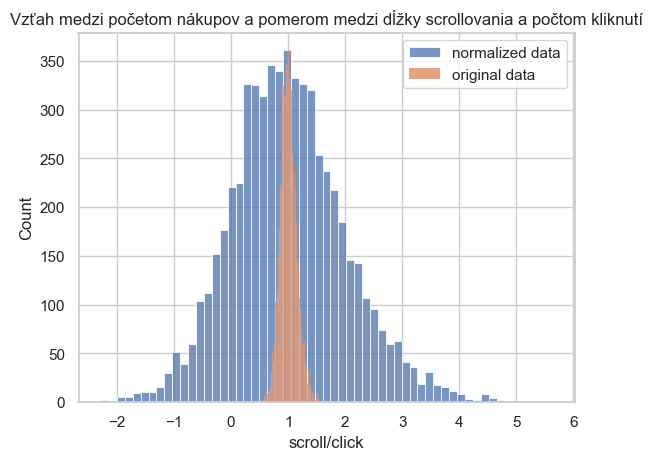

In [52]:
print(stats.ttest_1samp(norm + mu[0], popmean=1))
sns.histplot(norm + mu[0], label="normalized data")
sns.histplot(df_hyp1["scroll/click"], label="original data")

plt.legend()
plt.title("Vzťah medzi početom nákupov a pomerom medzi dĺžky scrollovania a počtom kliknutí")

### Z vysledku t-testu pre normalizovanu distribuciu pomeru nam vyplyva ze nezamietame H_0 pretoze p = 0.48 value spada do akceptovaneho rozsahu. Z tohoto vyplyva ze je statisticky najpravdepodobnejsie ze zakaznik nakupi ak na jednu sekundu scrollovania 1x klikne.